## Chapter27: Simple Scatter Plots

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

Source: [**Python Data Science Handbook** by **VanderPlas**](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [54]:
import numpy as np
import pandas as pd
print("numpy version :",np.__version__)
print("pandas version :",pd.__version__)

numpy version : 1.26.4
pandas version : 2.2.1


In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print("matplotlib version :",mpl.__version__)

matplotlib version : 3.8.4


### Scatter Plots with plt.plot 

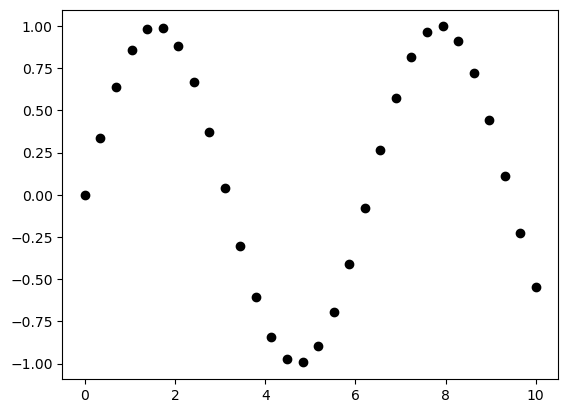

In [32]:
x = np.linspace(0,10,30)
y = np.sin(x)

plt.plot(x,y,'o', color= 'black');

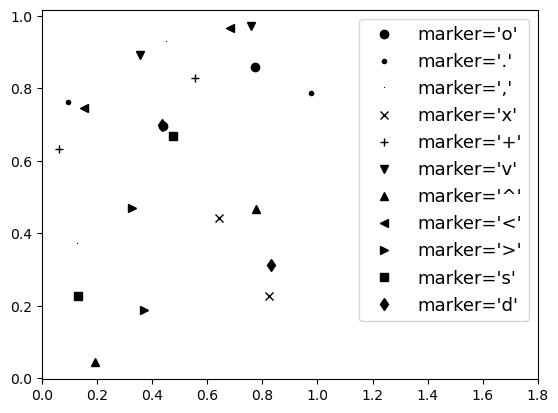

In [76]:
rng = np.random.default_rng(seed=42)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.random(2), rng.random(2), marker, color='black',
             label="marker='{0}'".format(marker))

plt.legend(numpoints=1, fontsize=13)
plt.xlim(0, 1.8);

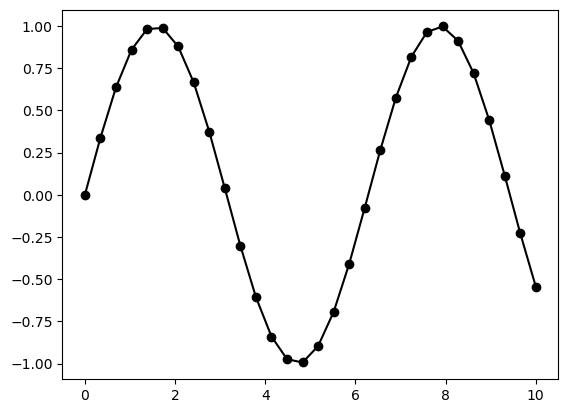

In [78]:
plt.plot(x,y, '-ok');

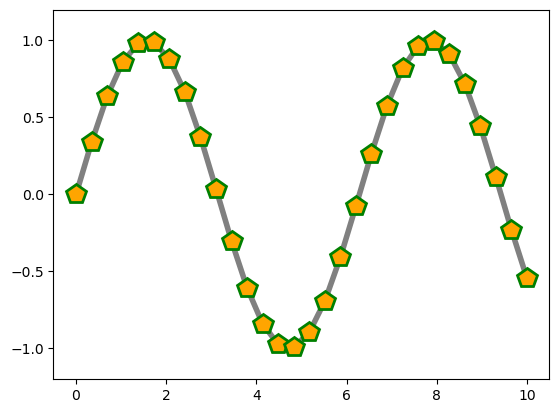

In [108]:
plt.plot(x,y, '-p', color='gray',
        markersize=15, linewidth=4,
        markerfacecolor='orange',
        markeredgecolor='green',
        markeredgewidth=2)
plt.ylim(-1.2,1.2);

### Scatter Plots with plt.scatter

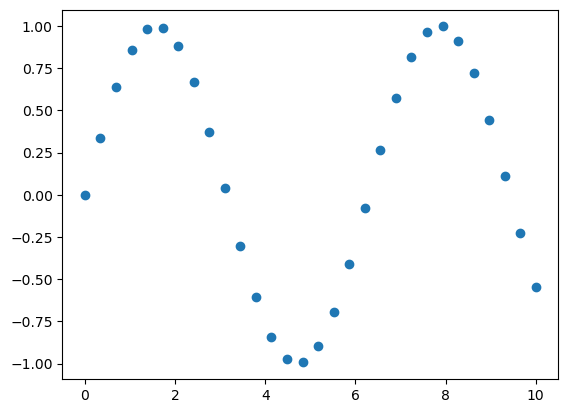

In [123]:
plt.scatter(x,y, marker= 'o');

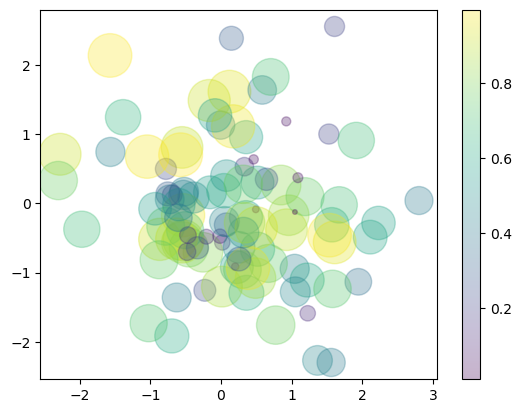

In [239]:
rng = np.random.default_rng(25)
x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
# sizes= 1000*rng.random(100)

plt.scatter(x,y, c=colors, s=colors*1000, alpha=0.3)
plt.colorbar();

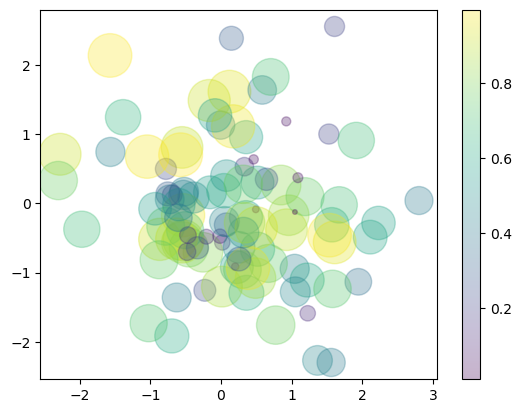

In [241]:
rng = np.random.default_rng(25)
x = rng.normal(size=100)
y = rng.normal(size=100)
# colors = rng.random(100)
sizes= 1000*rng.random(100)

plt.scatter(x,y, c=sizes/1000, s=sizes, alpha=0.3)
plt.colorbar();

In [233]:
rng = np.random.default_rng(25)
colors = rng.random(100)
# rng = np.random.default_rng(25)  # require this row to keep consistent
sizes = rng.random(100)

colors, sizes

(array([1.60721233e-01, 3.12035171e-04, 2.16598464e-01, 3.68029297e-01,
        2.02620801e-03, 1.93082880e-01, 9.90862179e-01, 7.86934282e-01,
        1.21281127e-01, 2.25771315e-01, 7.66826552e-01, 9.16838233e-01,
        3.53821714e-01, 7.85707239e-01, 1.46719268e-01, 5.41728557e-01,
        5.96861161e-01, 7.89900847e-01, 2.78632275e-01, 4.13633511e-01,
        3.76070856e-01, 1.37908415e-01, 6.75949846e-01, 5.57359477e-01,
        5.06181328e-01, 6.26412090e-01, 6.05258732e-01, 7.31561673e-02,
        2.99757100e-01, 4.03338086e-01, 1.88320186e-01, 7.20773584e-01,
        6.74194300e-01, 7.66963272e-01, 1.61638080e-02, 9.74222752e-02,
        2.44014493e-01, 5.41490094e-01, 7.74944183e-02, 9.27302480e-01,
        2.95472647e-02, 6.32057842e-01, 7.62373782e-01, 5.84176213e-01,
        3.85258064e-01, 8.60249826e-01, 2.95307476e-01, 1.85545687e-01,
        5.51355891e-01, 1.23689282e-01, 8.28973854e-02, 9.37560987e-01,
        4.74390293e-01, 2.23252215e-01, 7.00946760e-01, 8.933211

In [68]:
from sklearn.datasets import load_iris

In [70]:
iris = load_iris()

In [72]:
# print(iris.DESCR)
iris.feature_names,iris.target_names,iris.data.shape, iris.target.shape

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 (150, 4),
 (150,))

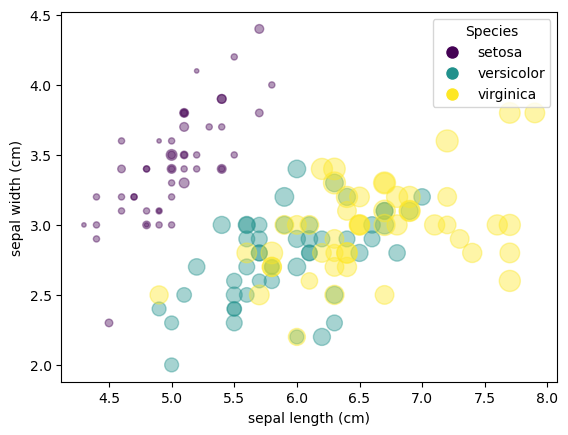

In [76]:
features = iris.data.T    # easier for refering

plt.scatter(features[0], features[1], alpha=0.4,
            s=100*features[3], c=iris.target)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Create legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=plt.cm.viridis(i/2), markersize=10)
           for i in range(len(iris.target_names))]
labels = iris.target_names

# Add the legend
plt.legend(handles, labels, title="Species");

### plot vs scatter: A Note of Efficiency

### Visualizing Uncertainties

#### Basic Errorbars

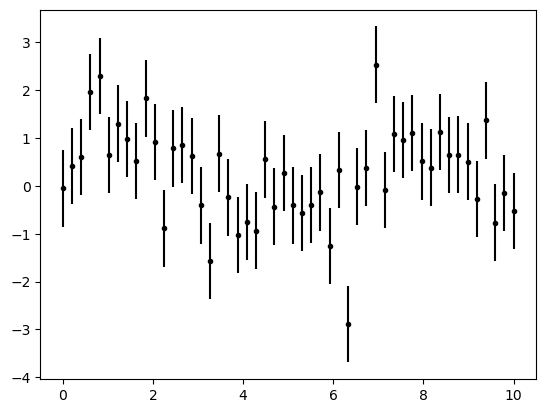

In [351]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy*np.random.randn(50)

plt.errorbar(x,y,yerr=dy,fmt='.k');

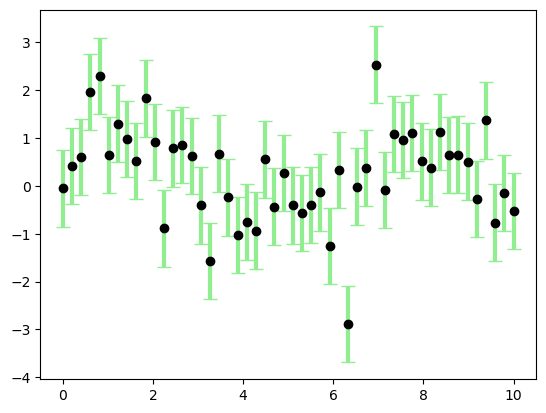

In [379]:
plt.errorbar(x,y, yerr=dy, fmt='o', color='black',
            ecolor='lightgreen', elinewidth = 3, capsize=5);

In [363]:
dy*np.random.normal(50)

39.686576910896896

In [353]:
dy*np.random.randn(50)

array([-1.21055887,  0.06562981,  0.0996396 ,  0.19127625, -0.85456843,
        1.63856342, -0.50712434, -1.49466961, -2.43274812, -0.26896313,
        0.79966377,  0.74477358, -0.70407328, -0.46106519,  0.18569404,
        0.08985467, -0.42481724,  1.63926524, -0.19344833,  1.12267021,
        1.6366836 , -1.354927  ,  0.49915452,  0.54946816, -0.1870234 ,
        0.45627159, -1.62728679,  1.14511054,  0.05826601, -0.73788735,
        0.29728513, -0.23092458, -2.29048221, -0.44766647, -1.60361289,
       -0.7435117 , -0.7160573 , -0.76904396, -1.30575931, -0.59037492,
        0.30009684, -1.58792471, -0.94424405, -0.25419803, -1.78259644,
        0.55811882,  1.36030652,  0.15950251, -0.45201844,  0.68621359])

In [365]:
y

array([-0.05152791,  0.41308265,  0.60547616,  1.96530578,  2.30010284,
        0.64620517,  1.305546  ,  0.98433633,  0.52067529,  1.83041153,
        0.91987842, -0.88547565,  0.78650496,  0.8572964 ,  0.62230303,
       -0.40457079, -1.56935606,  0.67473496, -0.23660564, -1.02624127,
       -0.75052261, -0.93144184,  0.55746126, -0.43431214,  0.27361163,
       -0.40442302, -0.56206301, -0.3982033 , -0.13432275, -1.25329454,
        0.33473075, -2.88962741, -0.01451168,  0.37801302,  2.53407402,
       -0.08819833,  1.08803891,  0.96340296,  1.10344617,  0.5139879 ,
        0.38134149,  1.12968202,  0.64636983,  0.65415218,  0.50960656,
       -0.26778783,  1.37213739, -0.76707093, -0.150094  , -0.5214393 ])

#### Continuous Errors

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# compute Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0,10,1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std=True)

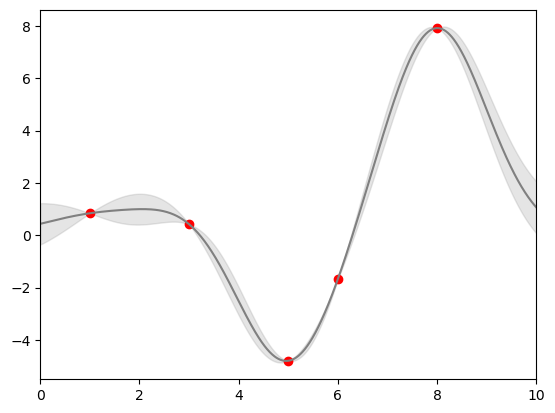

In [441]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);